<a href="https://colab.research.google.com/github/akiabe/coursera-dl-tf-in-practice/blob/master/C1W2_Kaggle_Dogs_vs_Cats_ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download example data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-06-02 02:49:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 2607:f8b0:4004:807::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   111MB/s    in 1.3s    

2020-06-02 02:49:05 (111 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-06-02 02:49:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 2607:f8b0:4004:810::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [applicati

In [0]:
# Access to the file system and unzip file
import os
import zipfile

# # UnZip to '/tmp' directory
local_zip = '/tmp/horse-or-human.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()

In [0]:
# Directory with training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [4]:
# Check filenames in the train directory
train_horse_fnames = os.listdir(train_horse_dir)
train_human_fnames = os.listdir(train_human_dir)
validation_horse_fnames = os.listdir(validation_horse_dir)
validation_human_fnames = os.listdir(validation_human_dir)

print(train_horse_fnames[:10])
print(train_human_fnames[:10])
print(validation_horse_fnames[:10])
print(validation_human_fnames[:10])

['horse03-2.png', 'horse33-5.png', 'horse26-8.png', 'horse14-2.png', 'horse37-8.png', 'horse48-4.png', 'horse21-8.png', 'horse47-8.png', 'horse14-7.png', 'horse36-9.png']
['human14-28.png', 'human03-18.png', 'human17-06.png', 'human05-07.png', 'human06-28.png', 'human08-00.png', 'human08-20.png', 'human02-23.png', 'human12-21.png', 'human11-01.png']
['horse4-503.png', 'horse5-018.png', 'horse2-544.png', 'horse4-232.png', 'horse5-192.png', 'horse1-224.png', 'horse2-412.png', 'horse6-345.png', 'horse5-103.png', 'horse5-275.png']
['valhuman03-07.png', 'valhuman01-22.png', 'valhuman01-07.png', 'valhuman03-04.png', 'valhuman04-10.png', 'valhuman03-06.png', 'valhuman04-08.png', 'valhuman03-18.png', 'valhuman05-17.png', 'valhuman04-16.png']


In [5]:
# Check total file numbers
print('total training horse images: ', len(os.listdir(train_horse_dir)))
print('total training human images: ', len(os.listdir(train_human_dir)))
print('total validation horse images: ', len(os.listdir(validation_horse_dir)))
print('total validation human images: ', len(os.listdir(validation_human_dir)))

total training horse images:  500
total training human images:  527
total validation horse images:  128
total validation human images:  128


In [0]:
import tensorflow as tf

In [0]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
# Optimizer
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocess by normalize the pixel values to be in the [0, 1] range
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

# Flow validation images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
# Training the model
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data=validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 16s 2s/step - loss: 0.6922 - accuracy: 0.5328 - val_loss: 0.7333 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 18s 2s/step - loss: 0.6817 - accuracy: 0.5284 - val_loss: 0.7441 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 19s 2s/step - loss: 0.6654 - accuracy: 0.5818 - val_loss: 0.6482 - val_accuracy: 0.6289
Epoch 4/100
8/8 [==============================] - 18s 2s/step - loss: 0.6316 - accuracy: 0.7175 - val_loss: 0.6621 - val_accuracy: 0.5234
Epoch 5/100
8/8 [==============================] - 18s 2s/step - loss: 0.5998 - accuracy: 0.6997 - val_loss: 0.5858 - val_accuracy: 0.5117
Epoch 6/100
8/8 [==============================] - 18s 2s/step - loss: 0.5773 - accuracy: 0.6908 - val_loss: 0.6033 - val_accuracy: 0.6289
Epoch 7/100
8/8 [==============================] - 19s 2s/step - loss: 0.5625 - accuracy: 0.7063 - val_loss: 0.6880 - val_accuracy: 0.5938
Epoch 8/100
8/8 [==========

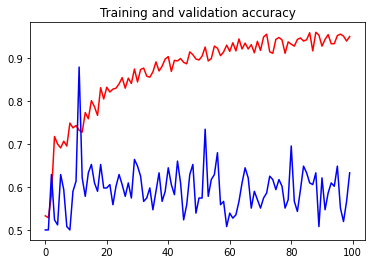

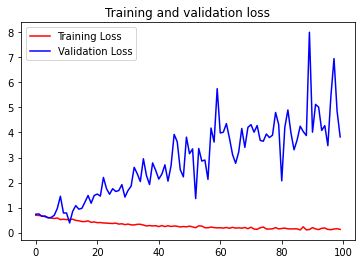

In [12]:
# Plotting accuracy
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Clean up
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )